In [28]:
!pip install fredapi > /dev/null

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option("display.max_columns", 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()['color']

from fredapi import Fred

fred_key = '141df9cc3c3fac09b9ad58c18366578b'

In [31]:
fred = Fred(api_key = fred_key)

Data Extraction: Fetching data from FRED api

In [32]:
data = fred.search('Currency Conversions')
data

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
ARGCCUSMA02STM,ARGCCUSMA02STM,2024-03-29,2024-03-29,Currency Conversions: US Dollar Exchange Rate:...,1960-01-01,2023-11-01,Monthly,M,Argentine Peso,Argentine Peso,Not Seasonally Adjusted,NSA,2024-01-12 14:29:03-06:00,41,OECD Descriptor ID: CCUSMA02 OECD unit ID: ARS...
CCUSMA02RUM618N,CCUSMA02RUM618N,2024-03-29,2024-03-29,Currency Conversions: US Dollar Exchange Rate:...,1992-06-01,2023-11-01,Monthly,M,Russian Ruble,Russian Ruble,Not Seasonally Adjusted,NSA,2024-01-12 14:15:03-06:00,39,OECD Descriptor ID: CCUSMA02 OECD unit ID: RUB...
ARGCCUSMA02STQ,ARGCCUSMA02STQ,2024-03-29,2024-03-29,Currency Conversions: US Dollar Exchange Rate:...,1960-01-01,2023-07-01,Quarterly,Q,Argentine Peso,Argentine Peso,Not Seasonally Adjusted,NSA,2023-11-17 12:00:09-06:00,9,OECD Descriptor ID: CCUSMA02 OECD unit ID: ARS...
CCUSMA02RUA618N,CCUSMA02RUA618N,2024-03-29,2024-03-29,Currency Conversions: US Dollar Exchange Rate:...,1993-01-01,2022-01-01,Annual,A,Russian Ruble,Russian Ruble,Not Seasonally Adjusted,NSA,2023-03-15 13:20:09-05:00,6,OECD Descriptor ID: CCUSMA02 OECD unit ID: RUB...
CCUSMA02RUQ618N,CCUSMA02RUQ618N,2024-03-29,2024-03-29,Currency Conversions: US Dollar Exchange Rate:...,1992-07-01,2023-07-01,Quarterly,Q,Russian Ruble,Russian Ruble,Not Seasonally Adjusted,NSA,2023-11-17 11:44:02-06:00,5,OECD Descriptor ID: CCUSMA02 OECD unit ID: RUB...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MKTGDPTOA646NWDB,MKTGDPTOA646NWDB,2024-03-29,2024-03-29,Gross Domestic Product for Tonga,1975-01-01,2021-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:45:45-06:00,0,GDP at purchaser's prices is the sum of gross ...
MKTGDPDMA646NWDB,MKTGDPDMA646NWDB,2024-03-29,2024-03-29,Gross Domestic Product for Dominica,1977-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:45:45-06:00,0,GDP at purchaser's prices is the sum of gross ...
NYGDPMKTPCDLDC,NYGDPMKTPCDLDC,2024-03-29,2024-03-29,Gross Domestic Product for Least Developed Cou...,1980-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2024-02-21 14:13:24-06:00,0,GDP at purchaser's prices is the sum of gross ...


In [33]:
data = fred.get_series('CCUSMA02INM618N')
data.name = 'values'
data

1957-01-01          NaN
1957-02-01          NaN
1957-03-01          NaN
1957-04-01          NaN
1957-05-01          NaN
                ...    
2023-08-01    82.785386
2023-09-01    83.047460
2023-10-01    83.235335
2023-11-01    83.298005
2023-12-01    83.299360
Name: values, Length: 804, dtype: float64

Data Transformation, Exploration, Cleaning

In [34]:
data.to_csv('Currency.csv')

In [35]:
data = pd.read_csv('Currency.csv')

In [36]:
data = data.reset_index()['values']
data

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
799    82.785386
800    83.047460
801    83.235335
802    83.298005
803    83.299360
Name: values, Length: 804, dtype: float64

In [37]:
data = data.dropna(axis = 0)
data

36      4.761900
37      4.761900
38      4.761900
39      4.761900
40      4.761900
         ...    
799    82.785386
800    83.047460
801    83.235335
802    83.298005
803    83.299360
Name: values, Length: 768, dtype: float64

In [38]:
data.tail()

799    82.785386
800    83.047460
801    83.235335
802    83.298005
803    83.299360
Name: values, dtype: float64

In [39]:
data.shape

(768,)

Data Visualisation

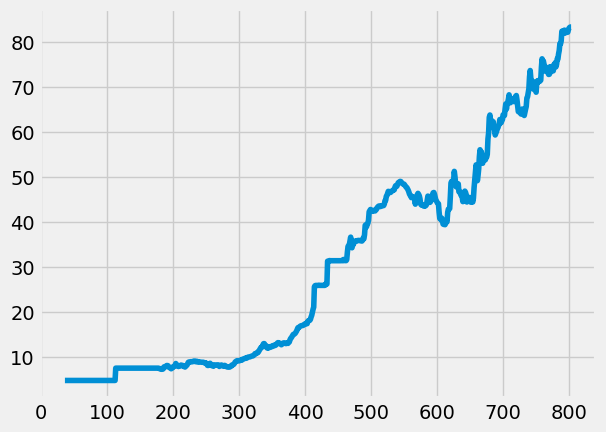

In [40]:
plt.plot(data)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

Spliting the dataset into traning and testing sets

In [42]:
##splitting dataset into train and test split
training_size=int(len(data)*0.65)
test_size=len(data)-training_size

train_data, test_data=data[0:training_size,:],data[training_size:len(data),:1]

In [43]:
training_size,test_size

(499, 269)

In [44]:
train_data

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [45]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [46]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [47]:
print(X_train.shape), print(y_train.shape)

(448, 50)
(448,)


(None, None)

In [48]:
print(X_test.shape), print(ytest.shape)

(218, 50)
(218,)


(None, None)

In [49]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

Creating Stacked LSTM Model

In [50]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [51]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model training

In [53]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=500,batch_size=64,verbose=1)

Epoch 1/500
7/7 [==============================] - 7s 302ms/step - loss: 0.0206 - val_loss: 0.0037
Epoch 2/500
7/7 [==============================] - 1s 98ms/step - loss: 0.0038 - val_loss: 0.0210
Epoch 3/500
7/7 [==============================] - 1s 97ms/step - loss: 0.0014 - val_loss: 0.0235
Epoch 4/500
7/7 [==============================] - 1s 99ms/step - loss: 8.6862e-04 - val_loss: 0.0022
Epoch 5/500
7/7 [==============================] - 1s 100ms/step - loss: 4.8963e-04 - val_loss: 0.0020
Epoch 6/500
7/7 [==============================] - 1s 96ms/step - loss: 3.9753e-04 - val_loss: 0.0022
Epoch 7/500
7/7 [==============================] - 1s 100ms/step - loss: 2.8318e-04 - val_loss: 0.0023
Epoch 8/500
7/7 [==============================] - 1s 114ms/step - loss: 2.8988e-04 - val_loss: 0.0021
Epoch 9/500
7/7 [==============================] - 1s 150ms/step - loss: 2.5381e-04 - val_loss: 0.0023
Epoch 10/500
7/7 [==============================] - 1s 156ms/step - loss: 2.5082e-04 - va

In [54]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

7/7 [==============================] - 1s 21ms/step


In [55]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [56]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

20.52356746256275

Model Testing

In [57]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

59.81750983906621

Plotting the line graph for prediction (training and testing) vs actual

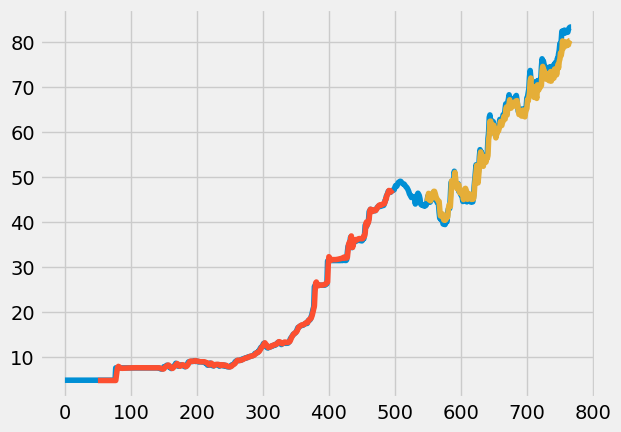

In [58]:
### Plotting
# shift train predictions for plotting
look_back=50
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [59]:

len(test_data)

269

In [60]:
x_input=test_data[219:].reshape(1,-1)
x_input.shape

(1, 50)

In [61]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [62]:
temp_input

[0.8491463181955783,
 0.8458473798531924,
 0.8473903104088368,
 0.8496151602827614,
 0.8860587037010283,
 0.9100700256279717,
 0.9027281729942866,
 0.9035807417667145,
 0.8942419490514456,
 0.8901487749808888,
 0.8749944409791283,
 0.8746935538726185,
 0.8843918491029541,
 0.8764192966525847,
 0.8702534433824561,
 0.8657596407802048,
 0.866222309704143,
 0.8876058859591728,
 0.8722696418343882,
 0.875968729959468,
 0.8883030679403995,
 0.8839436620380059,
 0.8760343092753847,
 0.8932474288081726,
 0.8879152766831796,
 0.8990693325038869,
 0.8872161131716727,
 0.8943659027856531,
 0.9101716738513504,
 0.9091958580401214,
 0.9238569085340113,
 0.9334740042837779,
 0.9529166385158787,
 0.9523245005407821,
 0.9609383158725486,
 0.9877861681116344,
 0.9810429194876913,
 0.9893662672096042,
 0.9821770461652752,
 0.9912040063425391,
 0.9871298358764289,
 0.9837201553612756,
 0.9878270039478996,
 0.9864306426870191,
 0.9853901928721396,
 0.9934556798024927,
 0.9967926133591274,
 0.999184783923

Model Deployment to predict for next n days

In [63]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<30):

    if(len(temp_input)>50):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.9641451]
51
1 month input [0.84584738 0.84739031 0.84961516 0.8860587  0.91007003 0.90272817
 0.90358074 0.89424195 0.89014877 0.87499444 0.87469355 0.88439185
 0.8764193  0.87025344 0.86575964 0.86622231 0.88760589 0.87226964
 0.87596873 0.88830307 0.88394366 0.87603431 0.89324743 0.88791528
 0.89906933 0.88721611 0.8943659  0.91017167 0.90919586 0.92385691
 0.933474   0.95291664 0.9523245  0.96093832 0.98778617 0.98104292
 0.98936627 0.98217705 0.99120401 0.98712984 0.98372016 0.987827
 0.98643064 0.98539019 0.99345568 0.99679261 0.99918478 0.99998275
 1.         0.96414512]
1 month output [[0.92187935]]
2 month input [0.84739031 0.84961516 0.8860587  0.91007003 0.90272817 0.90358074
 0.89424195 0.89014877 0.87499444 0.87469355 0.88439185 0.8764193
 0.87025344 0.86575964 0.86622231 0.88760589 0.87226964 0.87596873
 0.88830307 0.88394366 0.87603431 0.89324743 0.88791528 0.89906933
 0.88721611 0.8943659  0.91017167 0.90919586 0.92385691 0.933474
 0.95291664 0.9523245  0.96093832 0.9

In [72]:
month_new=np.arange(1,51)
month_pred=np.arange(51, 81)

In [73]:
import matplotlib.pyplot as plt

In [74]:
len(data)

768

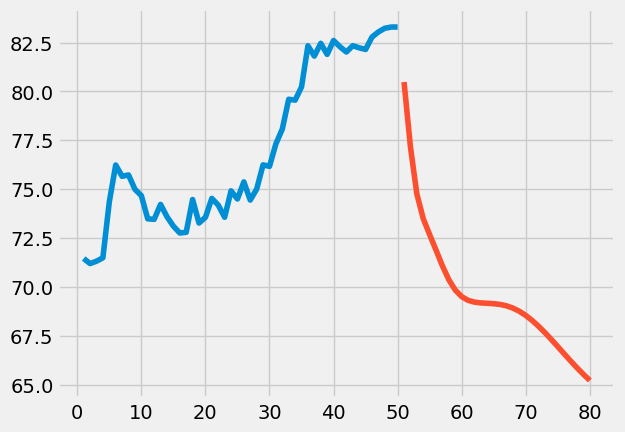

In [75]:
plt.plot(month_new,scaler.inverse_transform(data[718:]))
plt.plot(month_pred,scaler.inverse_transform(lst_output))

Smoothens the 'Red' line (predictions for next n months)

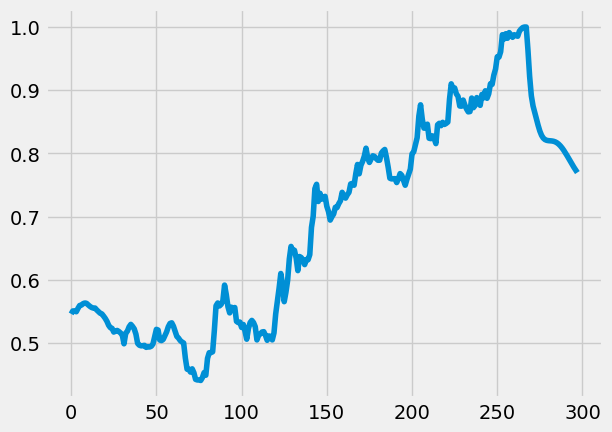

In [76]:
data1 = np.array(data).tolist()
data1.extend(lst_output)
plt.plot(data1[500:])

In [77]:
data1=scaler.inverse_transform(data1).tolist()

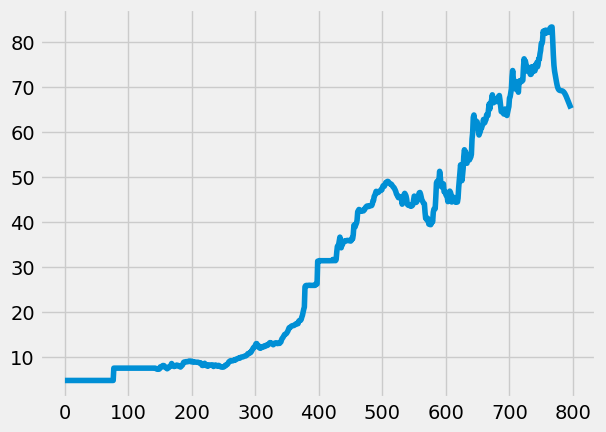

In [78]:
plt.plot(data1)